## Stroke Data Analysis

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

data = pd.read_csv("healthcare-dataset-stroke-data.csv")

In [3]:
data

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In the healthcare dataset, there are 11 patient features and one target variable [Stroke]. The features in the data are the patient ID, the body mass index (BMI), gender, age of patient, type of patient residence (either rural or urban), heart disease (a health parameter indicating if a patient has a heart disease or not), hypertension (another health feature indicating if a patient has hypertension -1 or not – 0), current smoking status of patient, average glucose level of the patient, the nature of the individual’s type of work and marriage status of the individual. 


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


From the data information, missing values are identified in the BMI column. There are blanks in the data. To deal with this, I will drop all rows with missing values. 

In [5]:
data = data.dropna()
data

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,56669,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5104,14180,Female,13.0,0,0,No,children,Rural,103.08,18.6,Unknown,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


After dropping the rows with at least one missing element, the number of entries in the health data set is reduced from 5110 rows  to 4909 rows. The dataset contains a mix of categorical and numerical variables.

In [6]:
data.stroke.value_counts(normalize=True)

0    0.957425
1    0.042575
Name: stroke, dtype: float64

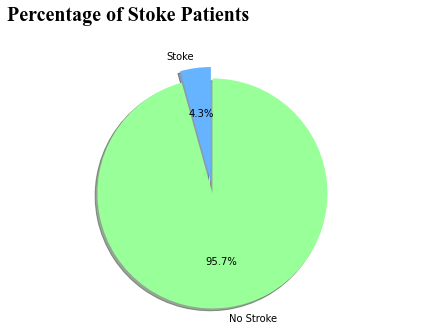

In [7]:
# Pie chart
labels = ['Stoke', 'No Stroke']
sizes = [4.3, 95.7]
explode = (0.1, 0)  
colors = ['#66b3ff','#99ff99']

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90,  colors=colors)

# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal')  

plt.tight_layout()
plt.title("Percentage of Stoke Patients", fontname="Times New Roman", fontweight="bold", loc = 'left', fontsize="20",  y=1.12)

plt.show()

### Impact of the numerical variables on Patient Stroke Outcome 

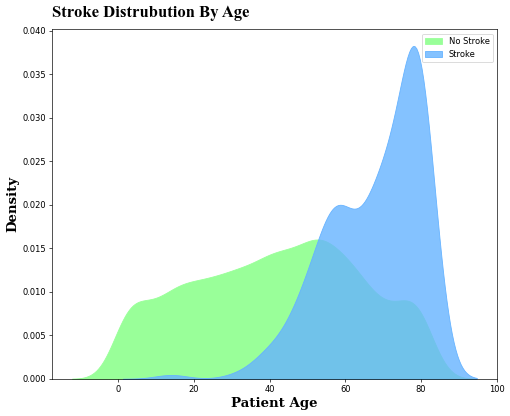

In [8]:
fig =plt.figure(figsize = (30,26), dpi = 60)

gs = fig.add_gridspec(10,24)
gs.update(wspace = 1, hspace = 0.05)

ax1 = fig.add_subplot(gs[6:9, 0:8]) #density distribution plot


sns.kdeplot(data = data[data['stroke'] == 0], x = 'age',ax = ax1, shade = True,  alpha = 1, color = '#99ff99' )
sns.kdeplot(data = data[data['stroke'] == 1], x = 'age',ax = ax1, shade = True,  alpha = 0.8, color = '#66b3ff')

ax1.set_xlabel('Patient Age', fontdict = {'font':'Serif', 'color': 'black', 'weight':'bold','size': 16})
ax1.set_ylabel('Density', fontdict = {'font':'Serif', 'color': 'black', 'weight':'bold','size': 16})
plt.title("Stroke Distrubution By Age", fontname="Times New Roman", fontweight="bold", loc = 'left', fontsize="20",  y=1.02)
plt.legend(labels=["No Stroke","Stroke"])

From the age-stroke distribution plot, it is evident that older people are more susceptible to stroke than the younger folks. Looking at the distribution, we can also observe that there is data for a wide range of ages, from babies/infants to adults. We can conclude that the age of a patient play a key role in determining the potential of developing stroke. 

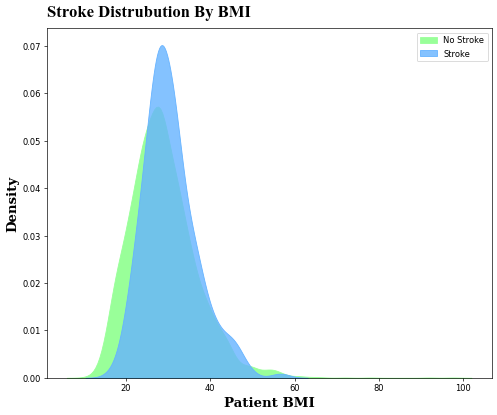

In [9]:
fig =plt.figure(figsize = (30,26), dpi = 60)

gs = fig.add_gridspec(10,24)
gs.update(wspace = 1, hspace = 0.05)

ax2 = fig.add_subplot(gs[6:9, 0:8]) #density distribution plot


sns.kdeplot(data = data[data['stroke'] == 0], x = 'bmi',ax = ax2, shade = True,  alpha = 1, color = '#99ff99' )
sns.kdeplot(data = data[data['stroke'] == 1], x = 'bmi',ax = ax2, shade = True,  alpha = 0.8, color = '#66b3ff')

ax2.set_xlabel('Patient BMI', fontdict = {'font':'Serif', 'color': 'black', 'weight':'bold','size': 16})
ax2.set_ylabel('Density', fontdict = {'font':'Serif', 'color': 'black', 'weight':'bold','size': 16})
plt.title("Stroke Distrubution By BMI", fontname="Times New Roman", fontweight="bold", loc = 'left', fontsize="20",  y=1.02)
plt.legend(labels=["No Stroke","Stroke"])

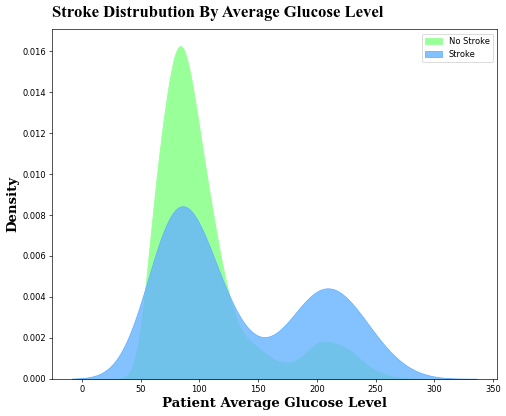

In [10]:
fig =plt.figure(figsize = (30,26), dpi = 60)

gs = fig.add_gridspec(10,24)
gs.update(wspace = 1, hspace = 0.05)

ax3 = fig.add_subplot(gs[6:9, 0:8]) #density distribution plot


sns.kdeplot(data = data[data['stroke'] == 0], x = 'avg_glucose_level',ax = ax3, shade = True,  alpha = 1, color = '#99ff99' )
sns.kdeplot(data = data[data['stroke'] == 1], x = 'avg_glucose_level',ax = ax3, shade = True,  alpha = 0.8, color = '#66b3ff')

ax3.set_xlabel('Patient Average Glucose Level', fontdict = {'font':'Serif', 'color': 'black', 'weight':'bold','size': 16})
ax3.set_ylabel('Density', fontdict = {'font':'Serif', 'color': 'black', 'weight':'bold','size': 16})
plt.title("Stroke Distrubution By Average Glucose Level", fontname="Times New Roman", fontweight="bold", loc = 'left', fontsize="20",  y=1.02)
plt.legend(labels=["No Stroke","Stroke"])

From the BMI-Stroke distribution, it is clear that stroke is prevalent in the patient with higher BMI compared to those with lower body mass Index. Looking at the glucose level distribution, we cannot really identify any specific trend between both groups of patients. 

### Impact of the categorical variables on Patient Stroke Outcome 